[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.

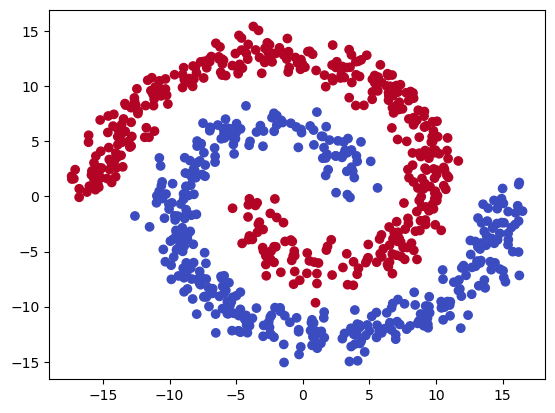

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [63]:
# Import variation of 2 spiral problem supplied in PDF
import numpy as np
from numpy import pi
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("DataSets/variationspiralDataset.csv", res, delimiter=",", header="", comments="", fmt='%.5f')
data = pd.read_csv('datasets/variationspiralDataset.csv', header=None, names=['x1', 'x2', 'y'])
# Split the dataset into features and labels
X = data[['x1', 'x2']].to_numpy()
y = data['y'].to_numpy()

print(y)
# print(res[:,2])
# # Plot the dataset
plt.scatter(X[:,0],X[:,1], c=y, cmap='coolwarm')
plt.show()
y = data['y'].to_numpy().astype(int)
new_arr = np.where(y == 0, 1,0)
y = np.column_stack((new_arr,y))
print(new_array)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
# print(y_tensor)

# y_onehot = torch.nn.functional.one_hot(y_tensor, num_classes=2).float()
#Declare empty Net class so that the training process can be defined before the specifics of each neural network are made such as the number of hidden layers and activation functions used
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()



In [64]:
##Function For calculating average accuracy
def calculate_accuracy(fold_training_accs,fold_test_accs):

    avg_train_accs, avg_test_accs = 0,0
    print("Training Results")
    for i in range(len(fold_training_accs)):
        print(f"Fold {i+1} Training Accuracy: {fold_training_accs[i]}, Test Accuracy:{fold_test_accs[i]}")
        avg_train_accs = avg_train_accs  + fold_training_accs[i]
        avg_test_accs = avg_test_accs + fold_test_accs[i]
    avg_train_accs = avg_train_accs/len(fold_training_accs)
    avg_test_accs = avg_test_accs/len(fold_test_accs)
    print()
    print("Testing Results:")
    print(f"Overall Training Accuracy: {avg_train_accs}")
    print()
    print(f"Overall Test Accuracy: {avg_test_accs}")

    return 


def calculate_losses(train_losses,test_losses,num_folds):

    for i in range(num_folds):
        print('Fold {}, Training loss: {:.4f}, Test loss: {:.4f}'
        .format(i+1, train_losses[i], test_losses[i]))

    avg_train_loss = sum(train_losses) / num_folds
    avg_test_loss = sum(test_losses) / num_folds
    print()
    print('Average Training loss: {:.4f}, Average Test loss: {:.4f}'
    .format(avg_train_loss, avg_test_loss))
    print("\n\n")

In [65]:
#Define the training function that trains the FFNN based on the data and hyper parameters
def train_FFNN(X,y,num_folds,num_epochs,learning_rate,input_size,hidden_size,output_size):

    criterion = nn.BCELoss()
    #Breaks data up into K-folds that are then trained and tested on independently
    kf = KFold(n_splits=num_folds, shuffle= True, random_state= 42)
    # Arrays that store information on models performance
    loss_list = []
    train_losses = []
    test_losses = []
    fold_test_accs = []
    fold_training_accs = []
    grid_predicted_folds = []

    #loops through the training process with the split up data for K Folds
    for fold, (train, test) in enumerate(kf.split(X)):
        net = Net(input_size, hidden_size, output_size)
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)


        print(f"Fold {fold + 1}/{num_folds}")

        # Split the dataset into training and test data
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]

        # Convert the training and test data to PyTorch tensors
        X_train = torch.from_numpy(X_train).type(torch.float32)
        X_test = torch.from_numpy(X_test).type(torch.float32)
        y_train = torch.from_numpy(y_train).type(torch.float32)
        y_test = torch.from_numpy(y_test).type(torch.float32)


         # Train the FFNN
        for epoch in range(num_epochs):
            # Forward pass
            outputs = net(X_train)
            loss = criterion(outputs, y_train)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Save the loss for this epoch
            loss_list.append(loss.item())

        # Save the training and test losses for this fold
        train_losses.append(loss_list[-1])
        test_loss = criterion(net(X_test), y_test)
        test_losses.append(test_loss.item())
        
        with torch.no_grad():
            outputs = net(X_train)
            _, predicted_class = torch.max(outputs.data, 1)
            predicted_class = np.array(predicted_class)
            fold_correct = sum(predicted_class[i] == y_train[i].argmax() for i in range(len(predicted_class)))
            fold_training_accs.append(fold_correct/len(y_train))
        
        #evaluates the test set to determine the accuracy
        with torch.no_grad():
            outputs = net(X_test)
            _, predicted_class = torch.max(outputs.data, 1)
            predicted_class = np.array(predicted_class)
            fold_correct = sum(predicted_class[i] == y_test[i].argmax() for i in range(len(predicted_class)))
            fold_test_accs.append(fold_correct/len(y_test))
    
        x1_min, x1_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
        x2_min, x2_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
        xx, yy = torch.meshgrid(torch.linspace(x1_min, x1_max, 100),
                                torch.linspace(x2_min, x2_max, 100))
        X_grid = torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)
        
        # Get the predicted_class class labels for the grid points
        with torch.no_grad():
            grid_outputs = net(X_grid)
            grid_predicted_class = torch.argmax(grid_outputs, dim=1)

        grid_predicted_folds.append(grid_predicted_class)
        # Plot the decision boundary
        plt.contourf(xx, yy, grid_predicted_class.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.argmax(axis=1), cmap='coolwarm')
        plt.title('Test Data with Decision Boundary')
        plt.show()
        net = None  
        
    #Calculate the average training and validation loss across all folds
    avg_train_loss = sum(train_losses) / num_folds
    avg_test_loss = sum(test_losses) / num_folds
    print('Average train loss: {:.4f}, Average val loss: {:.4f}'
        .format(avg_train_loss, avg_test_loss))
    
    calculate_losses(train_losses,test_losses,num_folds)
    calculate_accuracy(fold_training_accs,fold_test_accs)

    #Determine the average decision boundary across all 10 folds
    grid_predicted_folds = torch.stack(grid_predicted_folds)
    grid_predictions, _ = torch.mode(grid_predicted_folds, dim=0)    
    plt.contourf(xx, yy, grid_predictions.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
    # plt.scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1), cmap='coolwarm')
    plt.title('Test Data with Decision Boundary')
    plt.show()

In [ ]:
##FFNN First Attempt
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.fc3 = nn.Linear(hidden_size, output_size, bias=True)
        #Define activation functions that can be used
        self.reluAct = nn.ReLU()
        self.tanAct = nn.Tanh()
        self.lReluAct = nn.LeakyReLU()
        self.sigmoidAct = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.reluAct(x)
        x = self.fc2(x)
        x = self.reluAct(x)
        x = self.fc3(x)
        x = nn.Softmax(dim=0)(x)
        return x
    

# Changed these for initial 2 hidden layer FFNN the hyperparameters
input_size = 2
hidden_size = 16
output_size = 2
learning_rate = 0.02
num_epochs = 1000
num_folds = 10

# Create the FFNN 
train_FFNN(X,y,num_folds,num_epochs,learning_rate,input_size,hidden_size,output_size)

Fold 1/10


ValueError: Using a target size (torch.Size([720])) that is different to the input size (torch.Size([720, 2])) is deprecated. Please ensure they have the same size.